# Mean of angles
The mean of angles is computed in three steps:
- convert angular samples (radius, angle) into cartesian samples (x, y)
- compute the mean(x) and mean(y) of the cartesian samples
- convert the means back into angular representation

### Imports

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Helperfunctions for converting between cartesian and angular coordinates

In [7]:
def angles_to_cartesian(angles):
    """
    Converts polar angles (assumes radius 1) to cartesian x, y coordinates.

    Parameters
    ----------
    angles : list of floats
        angles in degrees

    Returns
    -------
    xs : list of floats
        cartesian x coordinates
    ys : list of floats
        cartesian x coordinates
    """    
    xs = [math.cos(angle/180*math.pi) for angle in angles]
    ys = [math.sin(angle/180*math.pi) for angle in angles]
    return (xs, ys)    


def cartesian_to_angular(x, y):
    """
    Converts a pair of cartesian x, y coordinates to a radius with angle
    """    
    angle = 180/math.pi * math.atan(y/x)
    radius = math.sqrt(x*x + y*y)
    return (radius, angle)    

### The actual computation with some example angles

In [8]:
angles = [45, 359]

In [9]:
xs, ys = angles_to_cartesian(angles)

# compute and plot mean
mx = np.array(xs).mean()
my = np.array(ys).mean()

print("radius = {:.2f}, mean angle = {:.1f}°".format(*cartesian_to_angular(mx, my)))

radius = 0.92, mean angle = 22.0°


### Plotting

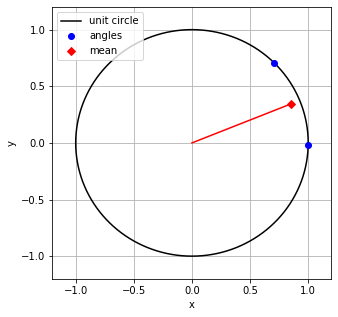

In [10]:
plt.figure(figsize=(5, 5))

# draw circle with radius 1 (unit circle)
cx, cy = angles_to_cartesian(np.arange(0, 360, 0.1))
plt.plot(cx, cy, "k-", label="unit circle")

# draw angular samples
plt.plot(xs, ys, "bo", label="angles")

# the mean
plt.plot(mx, my, "rD", label="mean")
plt.plot((0, mx), (0, my), "r-")

# beautify plot
plt.grid(True)
plt.xlabel("x"), plt.ylabel("y");
for ax_lim_func in (plt.xlim, plt.ylim):
    ax_lim_func((-1.2, 1.2))   
plt.legend(loc="upper left");